<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/preprocessing_pitvqa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1X6H9VClGaIIH5TlHqrIt2NKVYShSzrx2

Downloading...
From: https://drive.google.com/uc?id=1X6H9VClGaIIH5TlHqrIt2NKVYShSzrx2
To: /content/0001835.png
100% 528k/528k [00:00<00:00, 83.1MB/s]


raw image size: (720, 1280, 3)


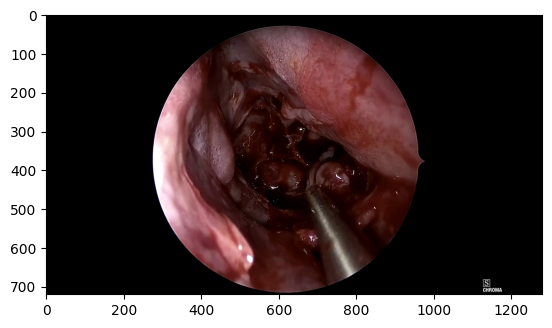

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

img = np.array(Image.open('0001835.png'))
print('raw image size:', img.shape)
plt.imshow(img);

#Cropping with detected center and radious

Raw image size: (720, 1280, 3)
center: 618 370 radious: 344
cropped image size: (688, 688, 3)


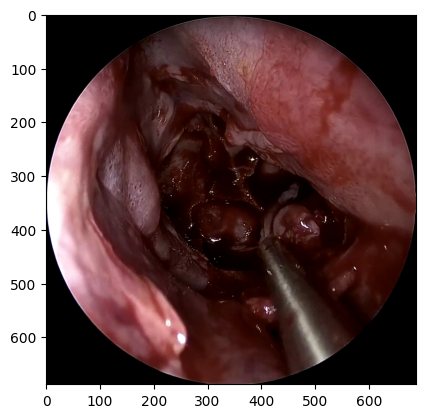

In [28]:
import cv2
import numpy as np
from PIL import Image

# Load the image
img = np.array(Image.open('0001835.png'))
print('Raw image size:', img.shape)

# Create mask from the red channel (or adjust condition based on requirement)
mask = np.zeros(img[:, :, 0].shape, dtype=np.uint8)
mask[img[:, :, 0] > 0] = 255

# Apply HoughCircles
circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 4.0, 100)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    (x, y, r) = circles[0:1][0]

    # Ensure cropping stays within image bounds
    x1, x2 = max(0, x - r), min(img.shape[1], x + r)
    y1, y2 = max(0, y - r), min(img.shape[0], y + r)

    # Crop the image
    img_cropped = img[y1:y2, x1:x2]
else:
    print('no mask:')

print('center:', x,y, 'radious:', r)
print('cropped image size:', img_cropped.shape)
plt.imshow(img_cropped);

#Cropping with detected center and fixed radious to maintain same resolution across the videos and remove black padding

Raw image size: (720, 1280, 3)
center: 618 370 dixed radious: 310
cropped image size: (620, 620, 3)
resized image size: (512, 512, 3)


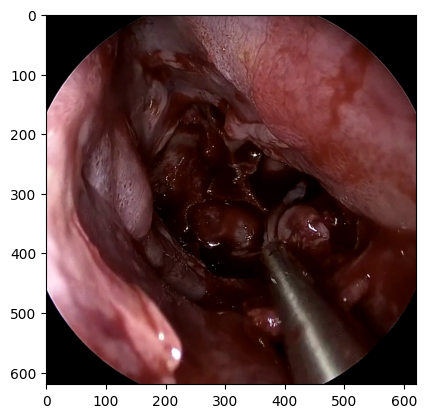

In [38]:
import cv2
import numpy as np
from PIL import Image

# Load the image
img = np.array(Image.open('0001835.png'))
print('Raw image size:', img.shape)

# Create mask from the red channel (or adjust condition based on requirement)
mask = np.zeros(img[:, :, 0].shape, dtype=np.uint8)
mask[img[:, :, 0] > 0] = 255

# Apply HoughCircles
circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 4.0, 100)
r_fixed = 310
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    (x, y, r) = circles[0:1][0] # Extract first detected circle

    # Ensure cropping stays within image bounds
    x1, x2 = max(0, x - r_fixed), min(img.shape[1], x + r_fixed)
    y1, y2 = max(0, y - r_fixed), min(img.shape[0], y + r_fixed)

    # Crop the image
    img_cropped = img[y1:y2, x1:x2]

    # Resize to 512x512 using PIL
    img_resized = Image.fromarray(img_cropped).resize((512, 512))

    # Save the resized image
    img_resized.save('0001835_processed.png')
else:
    print('no mask:')

print('center:', x,y, 'dixed radious:', r_fixed)
print('cropped image size:', img_cropped.shape)
print('resized image size:', np.array(img_resized).shape)
plt.imshow(img_cropped);